In [106]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import log_loss as logLoss

In [62]:
def Loss(y_pred, y_true):
    '''
    MSE
    '''
    y_pred = y_pred.reshape(-1,1)
    # y_true = np.array(y_true).reshape(-1,1)
    return 0.5 * np.mean((y_pred - y_true) ** 2)

У якості функції активації візьмемо порогову функцію:
$$ f(y)=\Bigg\{ \begin{matrix}
1, \; if \; y>0, \\
0, \; if\;  y=<0  \end{matrix}
$$

![loss.png](loss.png)

![grad.png](grad.png)

In [63]:
class Perceptron:
    def __init__(self, w=None, b=0, lossFunction = Loss, activationFunction = None):
        """
        :param: w -- вектор вагів
        :param: b -- зсув
        """
        self.w = w
        self.b = b
        self.lossFunction = lossFunction
        self.activationFunction = activationFunction
        
    def activate(self, x):
        if self.activationFunction is None:
            return np.array(x > 0, dtype=np.int64)
        else:
            return self.activationFunction(x)
        
    def forward_pass(self, X):
        """
        Фукція обчислює відповідь персептрона
        :param: X -- матриця об`єктів розміру (n, m)
        :return: вектор розміру (n, 1), значення - 0 або 1
        """
        n = X.shape[0]
        y_pred = np.zeros((n, 1))  # y_pred == y_predicted 
        y_pred = self.activate(X @ self.w.reshape(X.shape[1], 1) + self.b)
        return y_pred.reshape(-1, 1)
    
    def backward_pass(self, X, y, y_pred, learning_rate):
        """
        Оновлює значення вагів 
        :param: X -- матриця розміру (n, m)
                y -- вектор розмітки (n, 1) -  цільова змінна
                learning_rate - швидкість нвчання
        """
        n = len(y)
        y = np.array(y).reshape(-1, 1)
        self.w = self.w - learning_rate * (X.T @ (y_pred - y) / n)
        self.b = self.b - learning_rate * np.mean(y_pred - y)
    
    def fit(self, X, y, num_epochs=300, learning_rate=0.005):
        """
        зворотній прохід
        :param: X -- матрица объектов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                num_epochs -- количество итераций обучения
        :return: losses -- вектор значений функции потерь
        """
        self.w = np.zeros((X.shape[1], 1))  # стовбчик (m, 1)
        self.b = 0  # зсув
        losses = []  # значення функції помилок на кожному кроці оновлення вагів
        
        for _ in range(num_epochs):
            y_pred = self.forward_pass(X)
            losses.append(self.lossFunction(y_pred=y_pred, y_true=y))
            self.backward_pass(X, y, y_pred, learning_rate)

        return losses

Перевіремо `forward_pass()`

In [64]:
w = np.array([1., 2.]).reshape(2, 1)
w

array([[1.],
       [2.]])

In [65]:
b = 2.
X = np.array([[1., 2., -1.], [3., 4., -3.2]])

In [66]:
perceptron = Perceptron(w, b)
y_pred = perceptron.forward_pass(X.T)
print ("y_pred = " + str(y_pred))

y_pred = [[1]
 [1]
 [0]]


Перевіремо  `backward_pass()`:

In [67]:
y = np.array([1, 0, 1]).reshape(3, 1)
y

array([[1],
       [0],
       [1]])

In [69]:
perceptron.backward_pass(X.T, y, y_pred, 0.005)

print ("w = " + str(perceptron.w))
print ("b = " + str(perceptron.b))

w = [[0.995]
 [1.988]]
b = 2.0


### Example

https://www.kaggle.com/primaryobjects/voicegender

### Voice Gender

Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

The Dataset
The following acoustic properties of each voice are measured and included within the CSV:

- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
IQR: interquantile range (in kHz)
- skew: skewness (see note in specprop description)
- kurt: kurtosis (see note in specprop description)
- sp.ent: spectral entropy
...

- label: male or female


In [70]:
data = pd.read_csv("voice.csv")


In [71]:
data.shape

(3168, 21)

In [72]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [73]:
data['label'] = data['label'].apply(lambda x: 1 if x == 'male' else 0)

In [74]:
data['label'].value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [75]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [76]:
data.tail()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,0


In [77]:
# Перемішаємо дані
data = data.sample(frac=1)
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1450,0.179178,0.062323,0.186475,0.126803,0.225492,0.098689,1.110595,4.077164,0.940103,0.568020,...,0.179178,0.134829,0.047904,0.279070,1.007812,0.023438,3.585938,3.562500,0.158600,1
216,0.177642,0.059646,0.174659,0.124990,0.228148,0.103158,1.184981,4.167449,0.939683,0.508660,...,0.177642,0.120185,0.018957,0.271186,0.663125,0.093750,3.656250,3.562500,0.165427,1
2255,0.122956,0.082142,0.118592,0.044048,0.195908,0.151859,1.323653,5.209489,0.972679,0.808443,...,0.122956,0.166807,0.015857,0.275862,1.290799,0.023438,6.062500,6.039062,0.138041,0
365,0.119622,0.082924,0.108351,0.037606,0.198271,0.160665,2.517481,11.337017,0.955169,0.704673,...,0.119622,0.103756,0.016667,0.266667,0.689732,0.007812,6.867188,6.859375,0.127742,1
547,0.155171,0.067962,0.159920,0.091223,0.218378,0.127154,2.405710,11.302132,0.944387,0.625180,...,0.155171,0.081690,0.015640,0.266667,0.891493,0.007812,6.531250,6.523438,0.208238,1


In [79]:
X_train = data.iloc[:int(len(data)*0.7), :-1]  # матрица ознак
y_train = data.iloc[:int(len(data)*0.7), -1]  # значення полу (чоловік/жінка)

X_test = data.iloc[int(len(data)*0.7):, :-1]  # матрица ознак
y_test = data.iloc[int(len(data)*0.7):, -1]  # значення полу (чоловік/жінка)

In [80]:
perceptron = Perceptron()
losses=perceptron.fit(X_train.values, y_train.values)

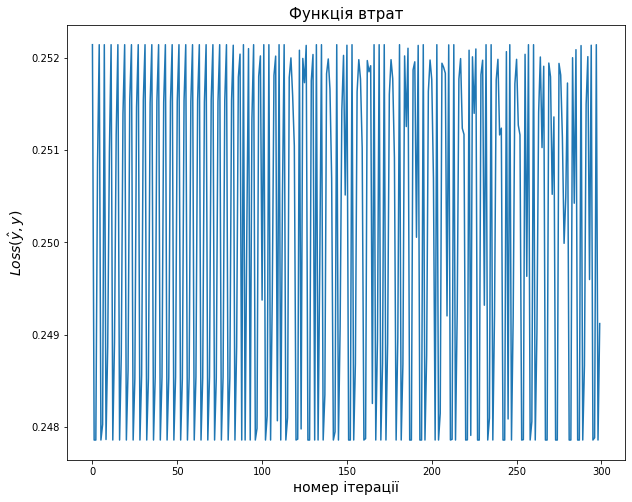

In [81]:
plt.figure(figsize=(10, 8))
plt.plot(losses)
plt.title('Функція втрат', fontsize=15)
plt.xlabel('номер ітерації', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
print('Точність нашего перцептрону: {:.3f} %'.format(
    accuracy_score(y_test.values, perceptron.forward_pass(X_test)) * 100))

Точність нашего перцептрону: 52.576 %


Скористуємось алгоритмом персептрону з бібліотеки `sklearn` та порівняємо результати

In [84]:
from sklearn.linear_model import Perceptron as skPerceptron

In [85]:
RANDOM_SEED = 42

sk_perceptron = skPerceptron(random_state=RANDOM_SEED)
sk_perceptron.fit(X_train.values, y_train.values)

Perceptron(random_state=42)

In [86]:
print('Точність перцептрону з sklearn: {:.3f} %'.format(
    accuracy_score(y_test.values, sk_perceptron.predict(X_test)) * 100))

Точність перцептрону з sklearn: 59.937 %


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(


Збільшемо кількість ітерацій

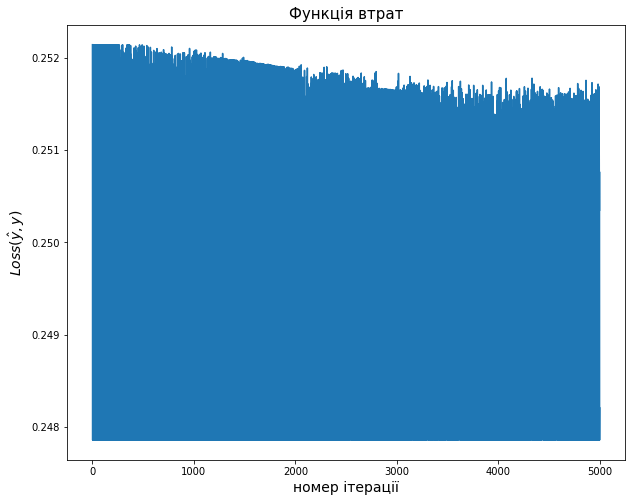

In [87]:
perceptron = Perceptron()
losses=perceptron.fit(X_train.values, y_train.values, num_epochs=5000)

plt.figure(figsize=(10, 8))
plt.plot(losses)
plt.title('Функція втрат', fontsize=15)
plt.xlabel('номер ітерації', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

In [88]:
print('Точність нашего перцептрону: {:.3f} %'.format(
    accuracy_score(y_test.values, perceptron.forward_pass(X_test)) * 100))

Точність нашего перцептрону: 59.306 %


In [89]:
sk_perceptron = skPerceptron(random_state=RANDOM_SEED, max_iter=5000)
sk_perceptron.fit(X_train.values, y_train.values, )

Perceptron(max_iter=5000, random_state=42)

In [90]:
print('Точність перцептрону з sklearn: {:.3f} %'.format(
    accuracy_score(y_test.values, sk_perceptron.predict(X_test)) * 100))

Точність перцептрону з sklearn: 59.937 %


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(


### Застосуємо нормалізацію

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler=MinMaxScaler()

In [93]:
train=scaler.fit_transform(X_train)

In [94]:
test = scaler.transform(X_test)

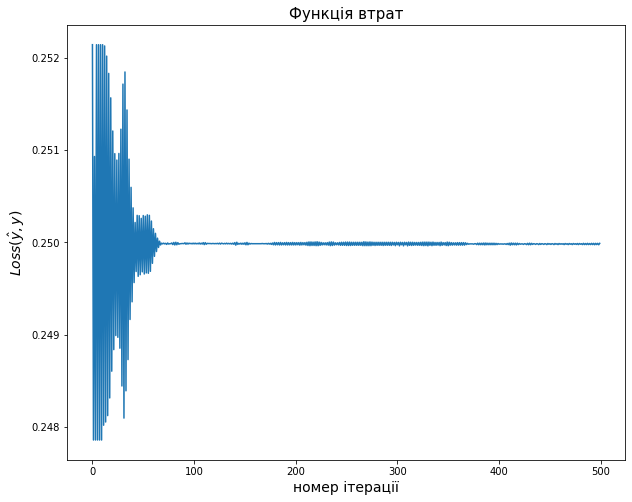

In [95]:
perceptron = Perceptron()
losses=perceptron.fit(train, y_train.values, num_epochs=500)

plt.figure(figsize=(10, 8))
plt.plot(losses)
plt.title('Функція втрат', fontsize=15)
plt.xlabel('номер ітерації', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

In [96]:
print('Точність нашего перцептрону: {:.3f} %'.format(
    accuracy_score(y_test.values, perceptron.forward_pass(test)) * 100))

Точність нашего перцептрону: 96.425 %


In [97]:
sk_perceptron = skPerceptron(random_state=RANDOM_SEED, max_iter=500)
sk_perceptron.fit(train, y_train.values, )

Perceptron(max_iter=500, random_state=42)

In [98]:
print('Точність перцептрону з sklearn: {:.3f} %'.format(
    accuracy_score(y_test.values, sk_perceptron.predict(test)) * 100))

Точність перцептрону з sklearn: 96.740 %


### Домашнє завдання
- Замість loss-функції втрат написати та застосувати log-loss функцію втрат
- Написати модель перцептрону користуючись функцією активації sigmoid. Порівняти результати
- Протестуте інші функції активації
- Змінити швидкість навчання


In [112]:
def test(activationFunction, numEpochs, learningRate):
    perceptron = Perceptron(lossFunction=logLoss, activationFunction=activationFunction)
    losses = perceptron.fit(
        X_train.values,
        y_train.values,
        num_epochs=numEpochs,
        learning_rate=learningRate
    )
    plot(losses)
    print(
        'Точність: {:.3f} %'.format(accuracy_score(y_test.values, perceptron.forward_pass(X_test.values)) * 100)
    )

def plot(losses):
    plt.figure(figsize=(10, 8))
    plt.plot(losses)
    plt.title('Функція втрат', fontsize=15)
    plt.xlabel('номер ітерації', fontsize=14)
    plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
    plt.show()

def sigmoid(x):
    exp = np.exp(x)
    return exp / (exp + 1) > 0.5

def atan(x):
    atan = np.arctan(x)
    return atan > 0

### Stock

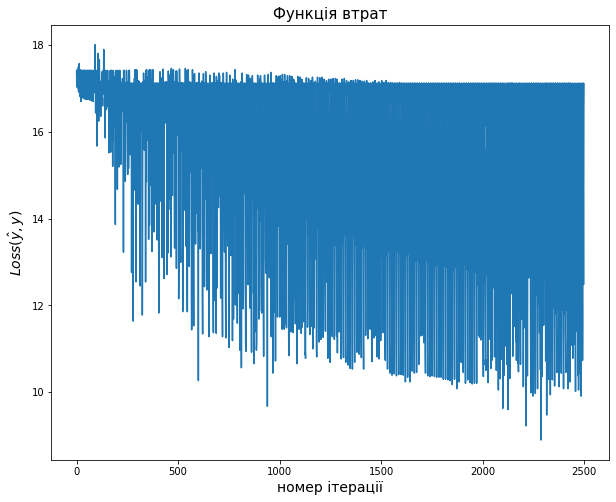

Точність: 56.993 %


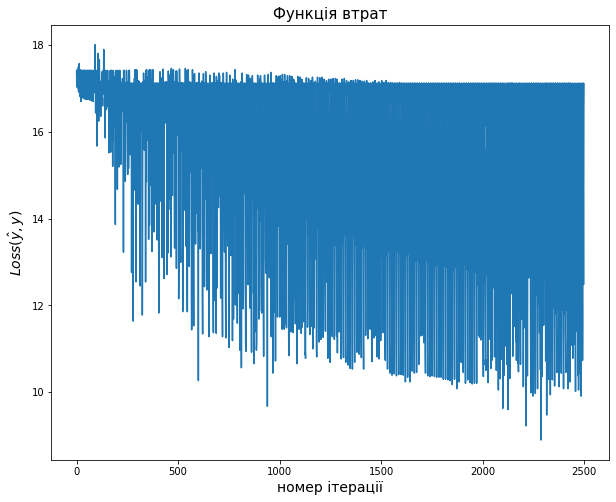

Точність: 56.993 %


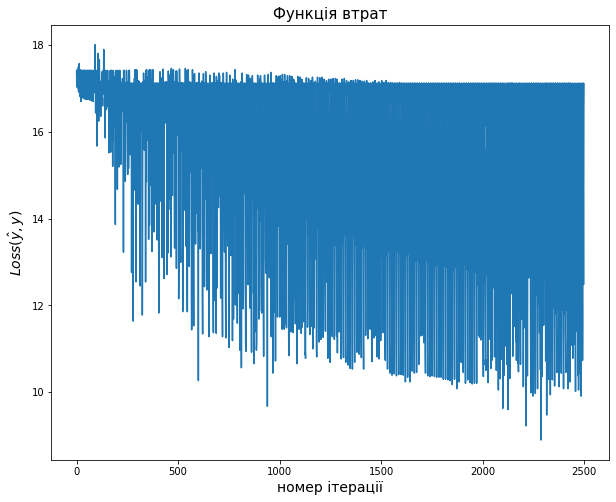

Точність: 56.993 %


In [100]:
test(None, 2500, 0.005)
test(None, 2500, 0.008)
test(None, 2500, 0.01)

### Sigmoid

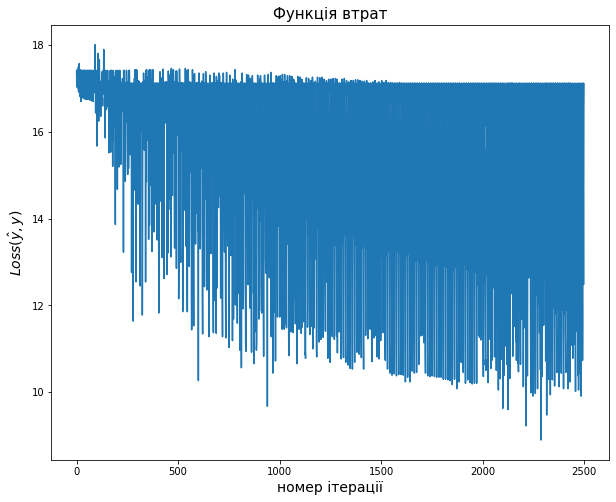

Точність: 56.993 %


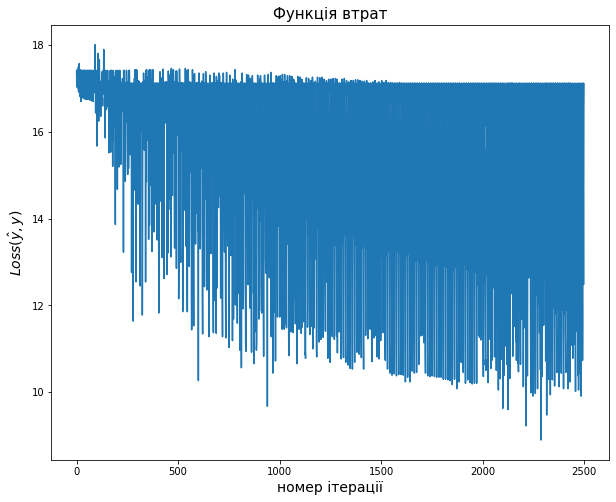

Точність: 56.993 %


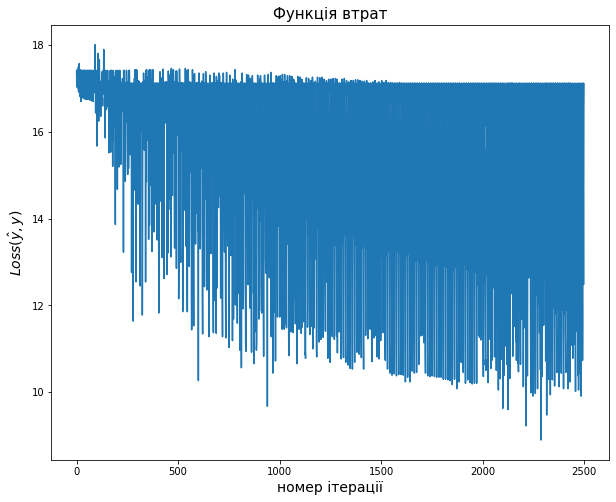

Точність: 56.993 %


In [101]:
test(sigmoid, 2500, 0.005)
test(sigmoid, 2500, 0.008)
test(sigmoid, 2500, 0.01)

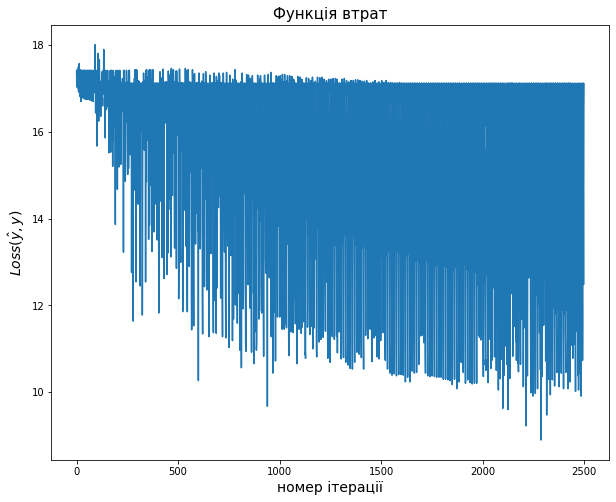

Точність: 56.993 %


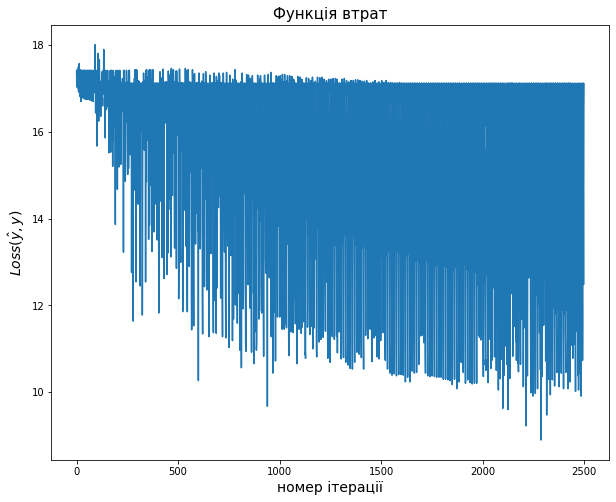

Точність: 56.993 %


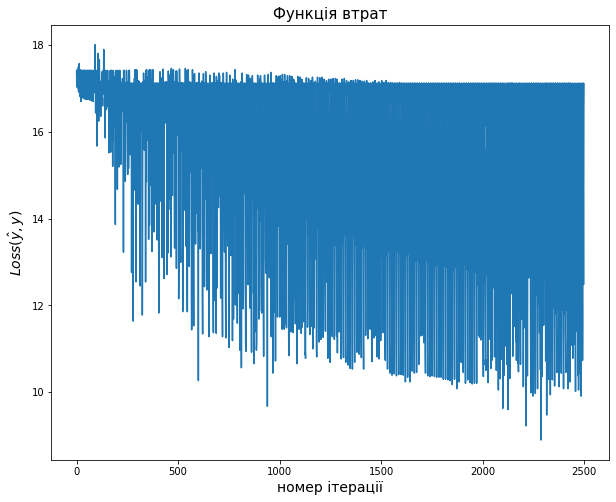

Точність: 56.993 %


In [113]:
test(atan, 2500, 0.005)
test(atan, 2500, 0.008)
test(atan, 2500, 0.01)

Выбранная функция активации не влияет на точность обучения модели при достаточном количестве итераций